# LIBRARY IMPORTING

In [46]:
import neurokit2 as nk
import numpy as np
import pandas as pd

In [47]:
import sys, os
sys.path.append(os.path.abspath(".."))   # go up one directory
print(sys.path)

from Neurokit2.eda_process import eda_process

['c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\python311.zip', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\DLLs', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\Lib', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama', '', 'C:\\Users\\AmitDebnath\\AppData\\Roaming\\Python\\Python311\\site-packages', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\Lib\\site-packages', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\Lib\\site-packages\\win32', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\AmitDebnath\\anaconda3\\envs\\Ollama\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\AmitDebnath\\Desktop\\test\\RAG\\Python codes\\EDA Project\\Notebooks\\Testing files for neurokit', 'c:\\Users\\AmitDebnath\\Desktop\\test\\RAG\\Python codes\\EDA Project\\Notebooks\\Testing files for neurokit']


# LOAD THE DATASET

In [48]:
from Neurokit2.eda_process import eda_process

# Load the local CSV file using pandas
data = pd.read_csv('C:/Users/AmitDebnath/Downloads/Kaggle dataset and ground truth/p1.csv/p1_18547_rows_value.csv')

# display(data)

# Extract the single column as 1D array
eda_signal = data.iloc[:, 0].values  # <-- ensures it's 1D

# Process EDA
# signals, info = nk.eda_process(eda_signal, sampling_rate=128)
signals, info = nk.eda_process(eda_signal, sampling_rate=128)

# Inspect results
print(info)
signals.head()

signals.to_csv("C:/Users/AmitDebnath/Downloads/1-18547_rows_value_eda_processed.csv", index=False)

{'SCR_Onsets': array([nan]), 'SCR_Peaks': array([34]), 'SCR_Height': array([49.56385476]), 'SCR_Amplitude': array([nan]), 'SCR_RiseTime': array([nan]), 'SCR_Recovery': array([nan]), 'SCR_RecoveryTime': array([nan]), 'sampling_rate': 128}


c:\Users\AmitDebnath\anaconda3\envs\Ollama\Lib\site-packages\neurokit2\eda\eda_peaks.py:127: RuntimeWarning: All-NaN slice encountered
  info["SCR_Peaks"] > np.nanmin(info["SCR_Onsets"]), ~np.isnan(info["SCR_Onsets"])


PermissionError: [Errno 13] Permission denied: 'C:/Users/AmitDebnath/Downloads/1-18547_rows_value_eda_processed.csv'

In [49]:
from Neurokit2.eda_process import eda_process

# Load the local CSV file using pandas
data = pd.read_csv("C:/Users/AmitDebnath/Downloads/p20_18547_rows_value.csv")

# display(data)

# Extract the single column as 1D array
eda_signal = data.iloc[:, 0].values  # <-- ensures it's 1D

# Process EDA
# signals, info = nk.eda_process(eda_signal, sampling_rate=128)
signals, info = nk.eda_process(eda_signal, sampling_rate=128)

# Inspect results
print(info)
signals.head()

signals.to_csv("C:/Users/AmitDebnath/Downloads/20-18547_rows_value_eda_processed.csv", index=False)

{'SCR_Onsets': array([   nan,    36.,    77.,   118.,   160.,   200.,   242.,   283.,
         324.,   365.,   407.,   447.,   488.,   529.,   571.,   610.,
         654.,   695.,   735.,   776.,   817.,   858.,   899.,   941.,
         982.,  1023.,  1064.,  1105.,  1146.,  1187.,  1229.,  1270.,
        1310.,  1352.,  1393.,  1434.,  1476.,  1517.,  1558.,  1599.,
        1640.,  1681.,  1722.,  1763.,  1805.,  1845.,  1887.,  1928.,
        1969.,  2010.,  2051.,  2092.,  2133.,  2175.,  2216.,  2257.,
        2298.,  2339.,  2379.,  2421.,  2463.,  2504.,  2545.,  2586.,
        2627.,  2668.,  2710.,  2750.,  2792.,  2833.,  2875.,  2915.,
        2956.,  2997.,  3039.,  3079.,  3121.,  3162.,  3203.,  3244.,
        3286.,  3326.,  3367.,  3409.,  3450.,  3491.,  3533.,  3594.,
        3636.,  3678.,  3720.,  3760.,  3801.,  3843.,  3884.,  3925.,
        3966.,  4008.,  4048.,  4089.,  4131.,  4172.,  4213.,  4254.,
        4296.,  4336.,  4378.,  4418.,  4460.,  4501.,  4542.,

PermissionError: [Errno 13] Permission denied: 'C:/Users/AmitDebnath/Downloads/20-18547_rows_value_eda_processed.csv'

In [54]:
# Use the already extracted phasic signals
# signals_phasic is a DataFrame with 'EDA_Phasic' column

# Detect peaks
peaks = nk.eda_findpeaks(signals_phasic['EDA_Phasic'])

# Extract peak amplitudes
peak_amplitudes = signals_phasic['EDA_Phasic'].iloc[peaks['SCR_Peaks']]

# Calculate max peak
max_peak = np.max(peak_amplitudes)
print("Max Peak Amplitude:", max_peak)

Max Peak Amplitude: 0.5213300336714464


# AMPLITUDE AND ONSETS

In [44]:
from scipy.stats import skew, kurtosis

scr_events = signals['SCR_Amplitude']
# print(scr_events)

onsets = signals['SCR_Onsets']
mean_onset = np.mean(onsets)
max_onset = np.max(onsets)
min_onset = np.min(onsets)
std_onset = np.std(onsets)

print("Mean of SCR Onsets from signals df:", mean_onset)
print("Max of SCR Onsets from signals df:", max_onset)
print("Min of SCR Onsets from signals df:", min_onset)
print("Std Dev of SCR Onsets from signals df:", std_onset)

mean = np.mean(scr_events)
min = np.min(scr_events)
max = np.max(scr_events)
range = max - min
skewness = pd.Series(scr_events).skew()
kurt = pd.Series(scr_events).kurtosis()

print("Mean of SCR Amplitudes from info dict:", mean)
print("Min of SCR Amplitudes from signals df:", min)
print("Max of SCR Amplitudes from signals df:", max)
print("Range of SCR Amplitudes from signals df:", range)
print("Skewness of SCR Amplitudes from signals df:", skewness)
print("Kurtosis of SCR Amplitudes from signals df:", kurt)


TypeError: string indices must be integers, not 'str'

# PEAKS

In [34]:
peaks = signals['SCR_Peaks']

mean_peaks = np.mean(peaks)
max_peaks = np.max(peaks)
min_peaks = np.min(peaks)
std_peaks = np.std(peaks)

print("Mean of SCR Peaks from signals df:", mean_peaks)
print("Max of SCR Peaks from signals df:", max_peaks)
print("Min of SCR Peaks from signals df:", min_peaks)
print("Std Dev of SCR Peaks from signals df:", std_peaks)

Mean of SCR Peaks from signals df: 0.02423490041560965
Max of SCR Peaks from signals df: 1
Min of SCR Peaks from signals df: 0
Std Dev of SCR Peaks from signals df: 0.15377766423461872


In [29]:
# Extract the relevant arrays, ignoring the initial NaN values where applicable
amp_peaks = info['SCR_Amplitude'][1:]
rise_time = info['SCR_RiseTime'][1:]
pos_peaks = info['SCR_Peaks']

print("Amplitude of Peaks:", amp_peaks)
print("Rise Time of Peaks:", rise_time)
print("Positions of Peaks:", pos_peaks)

Amplitude of Peaks: [0.15145817 0.13217452 0.14278791 0.12340308 0.12932726 0.12993516
 0.1350432  0.12717549 0.14209979 0.11985494 0.14980949 0.13681023
 0.13626849 0.13001358 0.19554645 0.0808774  0.13720396 0.14476143
 0.12511189 0.14487097 0.13649915 0.14885998 0.11550234 0.12600816
 0.14582892 0.14693057 0.13029433 0.13922059 0.14329229 0.13754866
 0.12631794 0.149451   0.13714799 0.1415126  0.1473958  0.12288002
 0.13988944 0.13822311 0.14183511 0.12477754 0.12952857 0.13382411
 0.1477341  0.13003264 0.14836252 0.1365868  0.13619829 0.1342922
 0.14565899 0.12754156 0.14242245 0.15248822 0.12888003 0.14795096
 0.14062294 0.13407149 0.13133365 0.19602524 0.09528828 0.13760189
 0.14142174 0.1439414  0.13123937 0.15410153 0.14641858 0.12149669
 0.13297134 0.14770828 0.14475527 0.11502    0.14672456 0.14376196
 0.13812383 0.13480271 0.14311676 0.13449042 0.14313629 0.14360286
 0.13840204 0.13140269 0.13904055 0.14251211 0.12984894 0.13321718
 0.13992277 0.21120149 0.15293047 0.2008987

In [5]:
# Extract the relevant arrays, ignoring the initial NaN values where applicable
amp_peaks = info['SCR_Amplitude'][1:]
rise_time = info['SCR_RiseTime'][1:]
pos_peaks = info['SCR_Peaks']

# Calculate the requested features
features = {
    'StD AmpPeaks': np.std(amp_peaks),
    'Var AmpPeaks': np.var(amp_peaks),
    'StD RiseTime': np.std(rise_time),
    'Var RiseTime': np.var(rise_time),
    'StD posPeaks': np.std(pos_peaks),
    'Var posPeaks': np.var(pos_peaks),
    'nbPeaks': len(pos_peaks),
    'ampPeaks': amp_peaks,
    'riseTime': rise_time,
    'posPeaks': pos_peaks
}

# Print the calculated features
for key, value in features.items():
    print(f"{key}: {value}")

StD AmpPeaks: nan
Var AmpPeaks: nan
StD RiseTime: nan
Var RiseTime: nan
StD posPeaks: 0.0
Var posPeaks: 0.0
nbPeaks: 1
ampPeaks: []
riseTime: []
posPeaks: [34]


c:\Users\AmitDebnath\anaconda3\envs\Ollama\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\AmitDebnath\anaconda3\envs\Ollama\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\AmitDebnath\anaconda3\envs\Ollama\Lib\site-packages\numpy\_core\_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\AmitDebnath\anaconda3\envs\Ollama\Lib\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [ ]:
import pandas as pd
import neurokit2 as nk
import numpy as np

# --- Load your actual data ---
# This is an example path, please replace it with your actual file path
try:
    data = pd.read_csv('C:/Users/AmitDebnath/Downloads/Kaggle dataset and ground truth/p1.csv/p1_18547_rows_value.csv')
    eda_signal = data.iloc[:, 0].values
except FileNotFoundError:
    print("File not found. Using a simulated signal for demonstration.")
    # If the file isn't found, use a simulated signal so the code can still run
    eda_signal = nk.eda_simulate(duration=60, sampling_rate=128, scr_number=8, drift=0.1, random_state=42)


# --- EXPERIMENT WITH PEAK FINDING PARAMETERS ---

# Option 1: Using the default 'neurokit' peak finder, but changing the minimum amplitude
# This is useful if your ground truth ignores very small peaks.
print("--- Using method='neurokit' with amplitude_min=0.05 ---")
signals_nk, info_nk = eda_process(
    eda_signal,
    sampling_rate=128,
    findpeaks_kwargs={'amplitude_min': 0.05} # Correctly pass peak finding arguments
)

print(f"Number of peaks found: {len(info_nk['SCR_Peaks'])}")
# To keep the output clean, we won't print the full info dictionary here,
# but you can uncomment the next line to inspect it.
# print(info_nk)


# Option 2: Changing the peak finding algorithm to 'biosppy'
print("\n--- Using method='biosppy' for peak finding ---")
signals_bio, info_bio = eda_process(
    eda_signal,
    sampling_rate=128,
    findpeaks_kwargs={'method': 'biosppy'} # Correctly specify the peak finding method
)
print(f"Number of peaks found: {len(info_bio['SCR_Peaks'])}")
# print(info_bio)


# --- Now, you can calculate your features from the 'info' dictionary ---
# Example using the output from Option 2 ('biosppy')

# Check if any peaks were found before proceeding
if info_bio['SCR_Peaks'].size > 0:
    # Extract the relevant arrays, ignoring any potential NaN values at the start
    amp_peaks = info_bio['SCR_Amplitude'][~np.isnan(info_bio['SCR_Amplitude'])]
    rise_time = info_bio['SCR_RiseTime'][~np.isnan(info_bio['SCR_RiseTime'])]
    pos_peaks = info_bio['SCR_Peaks']

    # Calculate the requested features
    features = {
        'StD AmpPeaks': np.std(amp_peaks) if amp_peaks.size > 0 else 0,
        'Var AmpPeaks': np.var(amp_peaks) if amp_peaks.size > 0 else 0,
        'StD RiseTime': np.std(rise_time) if rise_time.size > 0 else 0,
        'Var RiseTime': np.var(rise_time) if rise_time.size > 0 else 0,
        'StD posPeaks': np.std(pos_peaks),
        'Var posPeaks': np.var(pos_peaks),
        'nbPeaks': len(pos_peaks),
        'ampPeaks': amp_peaks,
        'riseTime': rise_time,
        'posPeaks': pos_peaks
    }

    print("\n--- Calculated Features (using 'biosppy' peak finder) ---")
    for key, value in features.items():
        # Check if the value is an array before trying to format it
        if isinstance(value, np.ndarray):
            # Print arrays in a more readable format
            print(f"{key}: {np.array2string(value, precision=4, separator=', ')}")
        else:
            print(f"{key}: {value}")
else:
    print("\nNo peaks were found with the 'biosppy' method.")

File not found. Using a simulated signal for demonstration.
--- Using method='neurokit' with amplitude_min=0.05 ---
Number of peaks found: 11

--- Using method='biosppy' for peak finding ---
Number of peaks found: 11

--- Calculated Features (using 'biosppy' peak finder) ---
StD AmpPeaks: 0.3940082729168844
Var AmpPeaks: 0.15524251912694606
StD RiseTime: 0.048990239661876524
Var RiseTime: 0.0024000435821280993
StD posPeaks: 2269.5150972971087
Var posPeaks: 5150698.776859504
nbPeaks: 11
ampPeaks: [1.0787, 0.9903, 1.0402, 0.1165, 0.918 , 1.0126, 0.9634, 0.9893, 0.1314,
 0.1106, 1.0066]
riseTime: [0.3672, 0.3438, 0.3594, 0.2578, 0.3438, 0.3594, 0.3672, 0.3516, 0.4062,
 0.2266, 0.3438]
posPeaks: [  89, 1026, 2019, 2342, 3034, 3912, 4872, 5920, 6475, 6535, 6826]


# PREPROCESSING

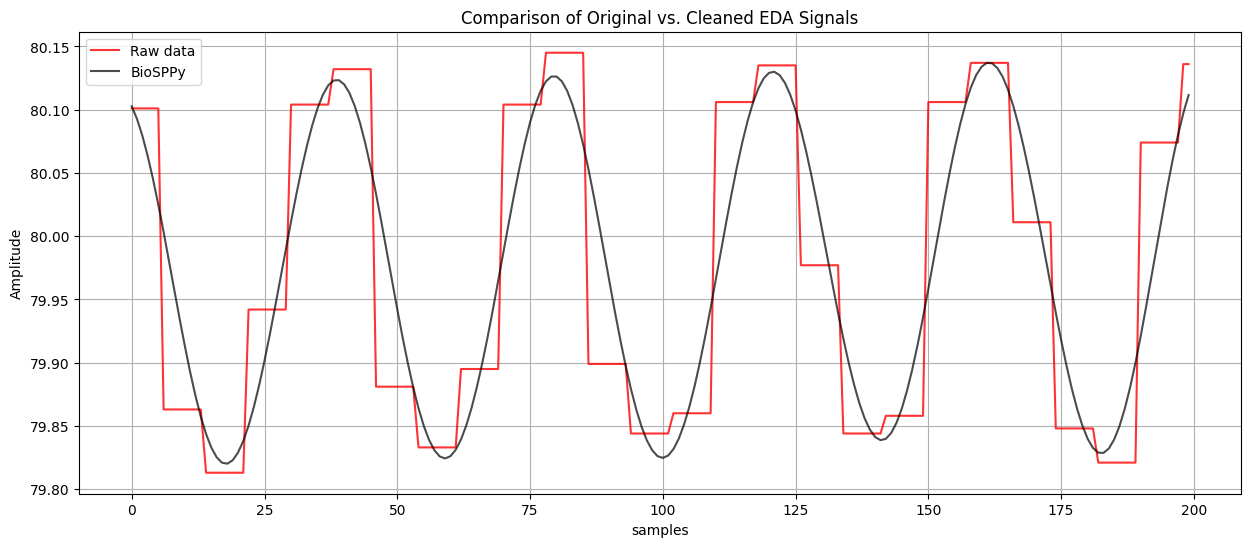

In [21]:
import matplotlib.pyplot as plt
from eda_clean import eda_clean
import scipy.signal

eda_clean1 = eda_clean(eda_signal, sampling_rate=128, method="neurokit")

eda_clean2 = eda_clean(eda_signal, sampling_rate=128, method="biosppy")

# nk.signal_plot([eda_signal, eda_clean2, eda_clean1,], labels=["Raw", "Neurokit","BioSPPy"])
# 6. Plot BOTH signals against their respective time axes
plt.figure(figsize=(15, 6))
plt.plot(np.arange(200),eda_signal[3000:3200], label='Raw data', color='red', alpha=0.8)
plt.plot(np.arange(200),eda_clean2[3000:3200], label='BioSPPy', color='black', alpha=0.7)


plt.title('Comparison of Original vs. Cleaned EDA Signals')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# ADDITIONAL STATISTICAL FEATURES USING NEUROKIT2(AI GOOGLE STUDIO CODE)

In [8]:
from scipy.stats import kurtosis, skew
from eda_analyze import eda_analyze

# Use the already processed 'signals' DataFrame
nk_features = eda_analyze(signals, sampling_rate=128)

# Compute stats on the cleaned signal
cleaned_signal = signals["EDA_Clean"].values

# First and second derivatives (gradients)
grad_1st = np.gradient(cleaned_signal)
grad_2nd = np.gradient(grad_1st)

# Create a dictionary to hold the new statistical features
statistical_features = {
    'MEAN': np.mean(cleaned_signal),
    'MAX': np.max(cleaned_signal),
    'MIN': np.min(cleaned_signal),
    'RANGE': np.max(cleaned_signal) - np.min(cleaned_signal),
    'KURT': kurtosis(cleaned_signal),
    'SKEW': skew(cleaned_signal),
    'MEAN_1ST_GRAD': np.mean(grad_1st),
    'STD_1ST_GRAD': np.std(grad_1st),
    'MEAN_2ND_GRAD': np.mean(grad_2nd),
    'STD_2ND_GRAD': np.std(grad_2nd),
    'RMSC': np.sqrt(np.mean(cleaned_signal**2)), # Root Mean Square
    'APSC': np.sum(signals["EDA_Phasic"]) # Area under Phasic Signal Curve
}

# Convert the dictionary to a pandas DataFrame
stats_df = pd.DataFrame([statistical_features])

# Concatenate the NeuroKit features and our custom statistical features
all_features = pd.concat([nk_features, stats_df], axis=1)

# Save to a CSV file
output_filename = 'p1_all_extractable_features.csv'
all_features.to_csv(output_filename, index=False)

# Display the Results
print("Successfully extracted and combined features.")
print(f"Data saved to '{output_filename}'")
print("\nCombined Features DataFrame:")
print(all_features.to_string())


Successfully extracted and combined features.
Data saved to 'p1_all_extractable_features.csv'

Combined Features DataFrame:
   SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  EDA_Sympathetic  EDA_SympatheticN  EDA_Autocorrelation      MEAN        MAX       MIN      RANGE         KURT       SKEW  MEAN_1ST_GRAD  STD_1ST_GRAD  MEAN_2ND_GRAD  STD_2ND_GRAD       RMSC          APSC
0          1.0                       NaN      5.348006         0.013063          0.000006             0.037679  79.94244  82.907269  9.892667  73.014602  1278.648849 -33.896424       0.003891      0.102983      -0.000162      0.005054  79.956724  13494.176558


c:\Users\AmitDebnath\Desktop\test\RAG\Python codes\EDA Project\Notebooks\Testing files for neurokit\Neurokit2\eda_intervalrelated.py:121: RuntimeWarning: Mean of empty slice
  output["SCR_Peaks_Amplitude_Mean"] = np.nanmean(data[peaks_idx]["SCR_Amplitude"].values)


In [9]:
import pandas as pd
import numpy as np

# --- 1. Define the path to your file ---
# Use a raw string (r"...") to avoid issues with backslashes in the path
file_path = r"C:\Users\AmitDebnath\Downloads\output_for_p1_ground_truth.csv"

try:
    # --- 2. Load the CSV file into a pandas DataFrame ---
    ground_truth_df = pd.read_csv(file_path)

    # --- 3. Calculate the mean of all numeric columns ---
    # This single line computes the average for each column and returns a Series
    summary_series = ground_truth_df.select_dtypes(include=np.number).mean()

    # --- 4. Convert the result to a DataFrame to display it as a single row ---
    summary_df = summary_series.to_frame().T

    # --- 5. Print the final summary row ---
    print("--- Single Row Summary of the Ground Truth File ---")
    
    # Use to_string() to ensure all columns are displayed neatly without wrapping
    print(summary_df.to_string())

    # --- Optional: Save this summary to a new CSV file ---
    # summary_df.to_csv('p1_ground_truth_summary.csv', index=False)
    # print("\nSuccessfully saved the summary to 'p1_ground_truth_summary.csv'")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path.")
    print(f"Please make sure the file exists at: {file_path}")

Error: The file was not found at the specified path.
Please make sure the file exists at: C:\Users\AmitDebnath\Downloads\output_for_p1_ground_truth.csv


# METHOD COMPARISON (eda_phasic)

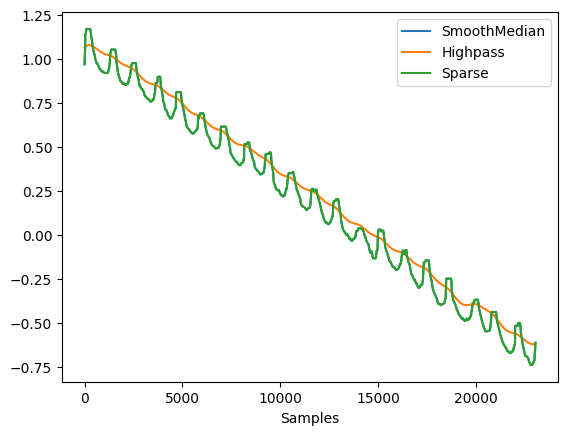

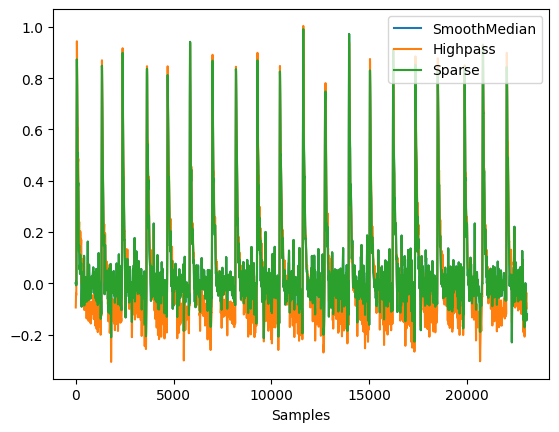

In [12]:
from eda_phasic import eda_phasic

# Decompose using different algorithms
# cvxEDA = nk.eda_phasic(eda_signal, method='cvxeda')
smoothMedian = eda_phasic(eda_signal, method='smoothmedian')

highpass = eda_phasic(eda_signal, method='highpass')

sparse = eda_phasic(eda_signal, method='smoothmedian')

# Extract tonic and phasic components for plotting
t1, p1 = smoothMedian["EDA_Tonic"].values, smoothMedian["EDA_Phasic"].values

t2, p2 = highpass["EDA_Tonic"].values, highpass["EDA_Phasic"].values

t3, p3 = sparse["EDA_Tonic"].values, sparse["EDA_Phasic"].values

# Plot tonic
nk.signal_plot([t1, t2, t3], labels=["SmoothMedian", "Highpass", "Sparse"])

# Plot phasic
nk.signal_plot([p1, p2, p3], labels=["SmoothMedian", "Highpass", "Sparse"])

# EXAMPLE (REAL DATA)

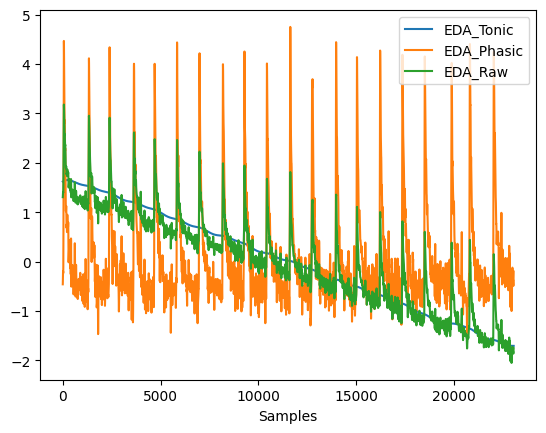

In [13]:
data = eda_phasic(nk.standardize(eda_signal), sampling_rate=128)

# data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=128)

data["EDA_Raw"] = eda_signal

nk.signal_plot(data, standardize=True)

# eda_peaks()

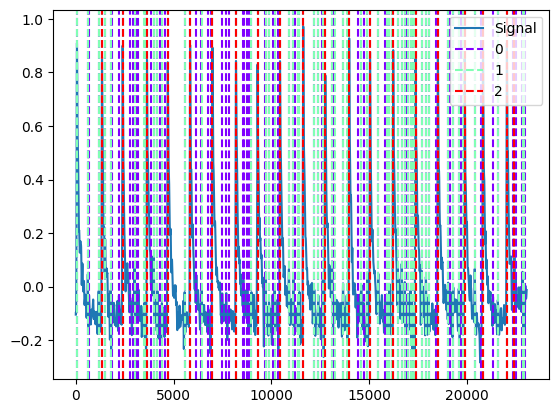

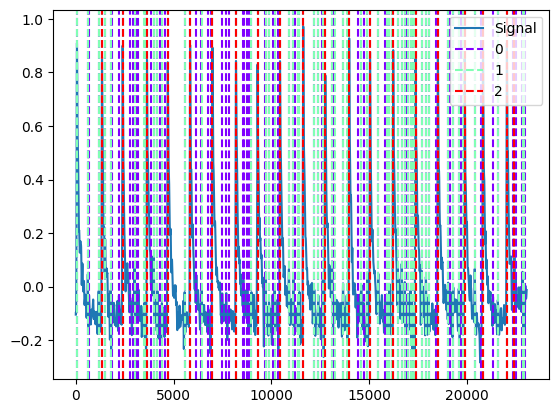

In [14]:
# Get phasic components
from eda_peaks import eda_peaks
# eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=128)

eda_cleaned = eda_clean(eda_signal, sampling_rate=128)

eda = eda_phasic(eda_cleaned, sampling_rate=128)

eda_phasic = eda["EDA_Phasic"].values

# find peaks

# _, kim2004 = nk.eda_peaks(eda_phasic, sampling_rate=128, method="kim2004")
_, kim2004 = eda_peaks(eda_phasic, sampling_rate=128, method="kim2004")
# _, neurokit = nk.eda_peaks(eda_phasic, sampling_rate=128, method="neurokit")
_, neurokit = eda_peaks(eda_phasic, sampling_rate=128, method="neurokit")
# _, nabian2018 = nk.eda_peaks(eda_phasic, sampling_rate=128, method="nabian2018")
_, nabian2018 = eda_peaks(eda_phasic, sampling_rate=128, method="nabian2018")
nk.events_plot([nabian2018["SCR_Peaks"], neurokit["SCR_Peaks"], kim2004["SCR_Peaks"]],eda_phasic)

# eda_fixpeaks()

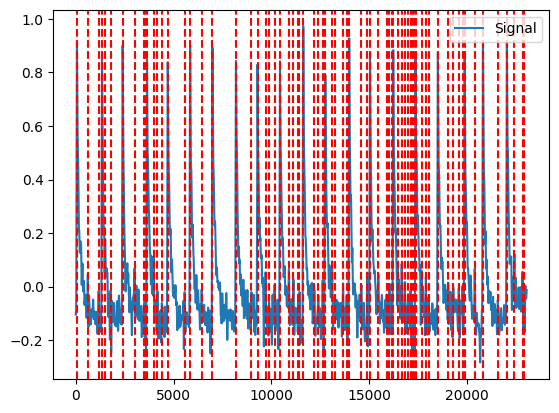

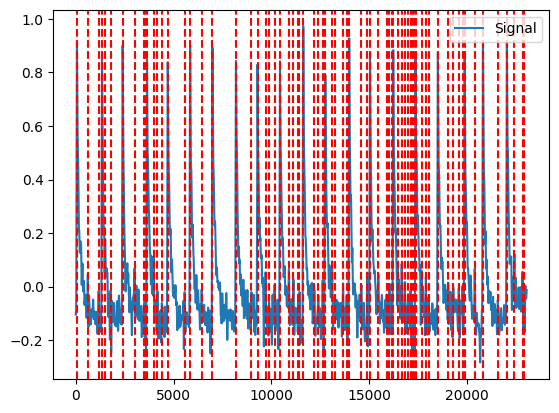

In [15]:
# Only import each function once
from eda_fixpeaks import eda_fixpeaks
from eda_peaks import eda_findpeaks

# Use already defined eda_cleaned and eda_phasic
info = eda_findpeaks(eda_phasic)
info = eda_fixpeaks(info)

nk.events_plot(info["SCR_Peaks"], eda_phasic)


In [16]:
eda_signal = data.iloc[:, 0]   # keep as Series, not .values

# Now .head() works
eda_signal.head()


0    1.473826
1    1.474046
2    1.474265
3    1.474483
4    1.474700
Name: EDA_Tonic, dtype: float64

926

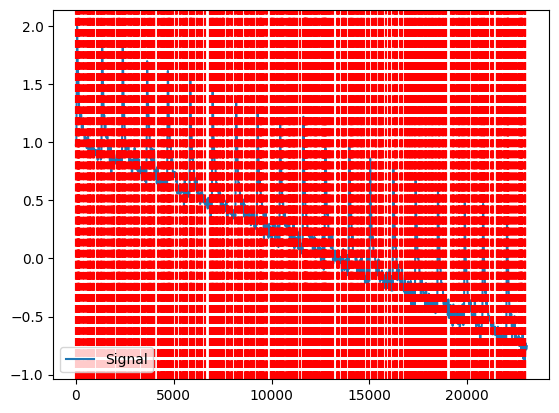

In [17]:
from eda_changepoints import eda_changepoints
# eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=128)

# nk.eda_changepoints(eda_cleaned, penalty = 100, show=True)
eda_changepoints(eda_cleaned, penalty = 100, show=True)

In [18]:
# df, info = nk.eda_process(eda_signal, sampling_rate=128)
from eda_intervalrelated import eda_intervalrelated
df, info = eda_process(eda_signal, sampling_rate=128)

# Single dataframe is passed
# nk.eda_intervalrelated(df, sampling_rate=128)
eda_intervalrelated(df, sampling_rate=128)


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,20.0,0.025553,0.908289,0.000112,0.000167,0.935027


In [19]:
epochs = nk.epochs_create(df, events=[0, 5000], sampling_rate=128, epochs_end=20)

eda_intervalrelated(epochs, sampling_rate=128)
# nk.eda_intervalrelated(epochs, sampling_rate=128)

,Label,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
1,1,3,0.019681,0.077053,NaN,NaN,NaN
2,2,2,0.025944,0.103417,NaN,NaN,NaN
